In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

# The thing
I got curious if image classification may also be applicable to codes: distinguishing between different websites.
So I decided to distinguish between Pininterest, Github, and Facebook.

# Data

In [1]:
import sys
sys.path

['/home/ubuntu/fast-ai-notebook/nbs/dl1',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython']

In [60]:
path = Path('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework-images/downloads')
path

PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads')

In [61]:
fnames = get_image_files(path)
fnames

[PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads/pininterest 26. jfxhfp9ottkbomwm1ch2_pinterest-seo-5.png'),
 PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads/github 39. file-dne32zrbrj.png'),
 PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads/pininterest 8. custom-pinterest-board-covers-11-1200x625.jpg'),
 PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads/github 44. dependencies.png'),
 PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads/pininterest 16. bbm-before-1.jpg'),
 PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads/pininterest 10. lowes-pinterest-marketing.jpg'),
 PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads/pininterest 47. artboard_horizontal.jpg'),
 PosixPath('/home/ubuntu/fast-ai-notebook/nbs/dl1/lesson1-homework2-images/downloads/pin

In [62]:
getLabels = lambda x : str(x).split(" ")[0].split("/")[-1]
labels = [getLabels(x) for x in fnames]
labels

['pininterest',
 'github',
 'pininterest',
 'github',
 'pininterest',
 'pininterest',
 'pininterest',
 'pininterest',
 'facebook',
 'facebook',
 'github',
 'pininterest',
 'pininterest',
 'pininterest',
 'facebook',
 'github',
 'github',
 'pininterest',
 'facebook',
 'github',
 'github',
 'pininterest',
 'github',
 'facebook',
 'github',
 'github',
 'pininterest',
 'facebook',
 'pininterest',
 'github',
 'facebook',
 'facebook',
 'github',
 'github',
 'pininterest',
 'pininterest',
 'facebook',
 'facebook',
 'github',
 'github',
 'pininterest',
 'github',
 'facebook',
 'github',
 'facebook',
 'pininterest',
 'github',
 'facebook',
 'facebook',
 'github',
 'pininterest',
 'pininterest',
 'github',
 'facebook',
 'github',
 'facebook',
 'facebook',
 'facebook',
 'pininterest',
 'facebook',
 'pininterest',
 'github',
 'facebook',
 'pininterest',
 'github',
 'pininterest',
 'github',
 'github',
 'pininterest',
 'facebook',
 'facebook',
 'facebook',
 'github',
 'facebook',
 'github',
 'faceb

for `np.random.seed(2)`:
https://forums.fast.ai/t/why-do-we-set-random-seed-from-numpy/37027/2
> @rev1c0sm0s I think @jeremy mentioned this at starting of lesson 2. This is mainly for making sure we can reproduce results when you come back to the notebook on that instance next time.

In [63]:
np.random.seed(2) 

In [64]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_lists(path, fnames, labels=labels, ds_tfms=tfms, size=500, bs=24)

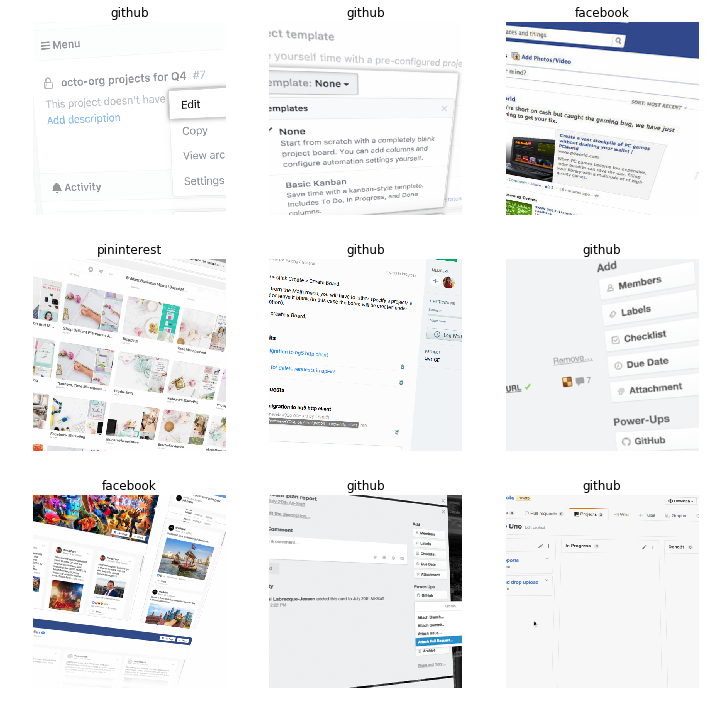

In [65]:
data.show_batch(rows=3, figsize=(10,10))

In [71]:
doc(ImageDataBunch.from_lists)

In [66]:
print(data.classes)
len(data.classes),data.c

['facebook', 'github', 'pininterest']


(3, 3)

# Learn

In [67]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [68]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [69]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.282681,1.631925,0.833333,00:05
1,0.874364,0.721179,0.400000,00:05
2,0.637030,0.393861,0.200000,00:05
3,0.520299,0.237200,0.133333,00:05


Wow. At first 83% of error rate, but at last only 13%. Not bad. Huh?

In [70]:
learn.save('stage-1')

# Results

In [72]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

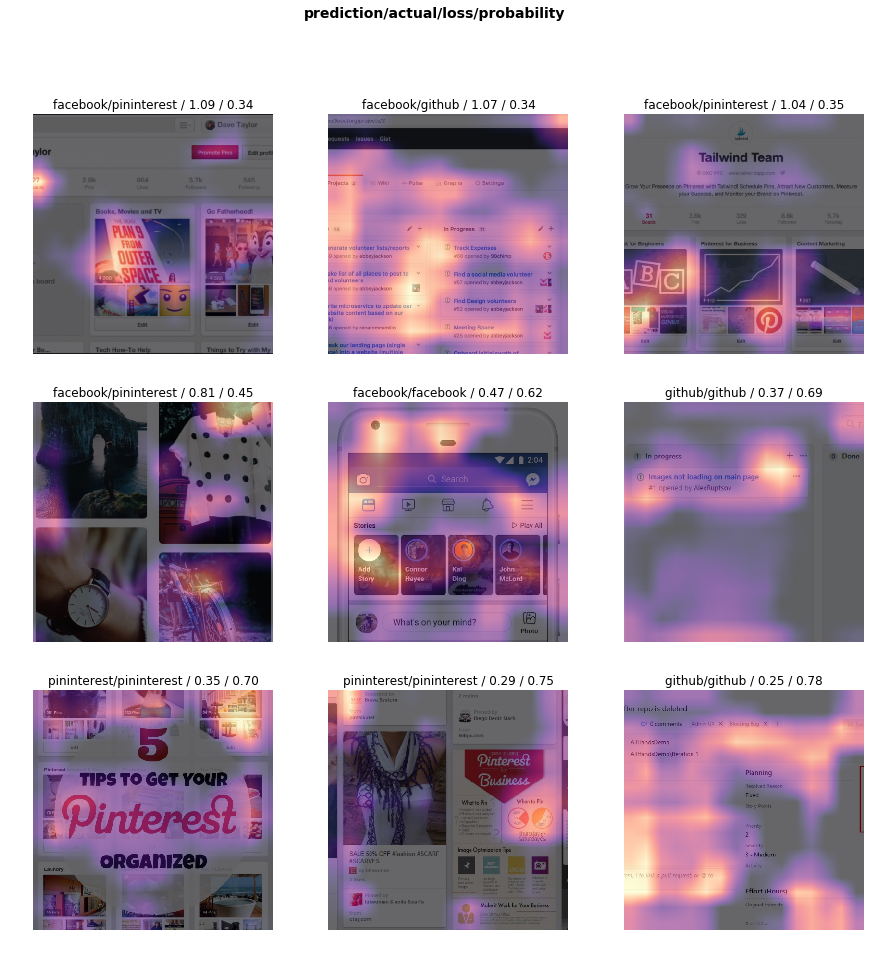

In [75]:
interp.plot_top_losses(9, figsize=(15,15))

Hmm.. why also show correct results as well? Has fastai went somewhere wrong? Let's see.

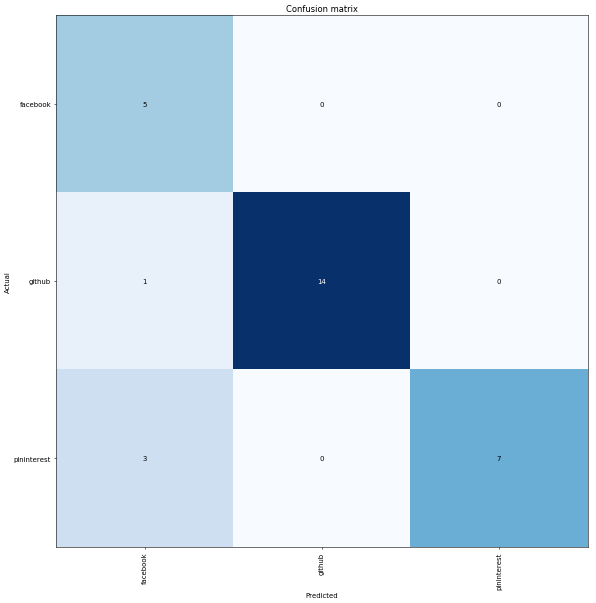

In [79]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=50)

Well no. There were only 4 wrong answers, so because I asked fastai to display `9` figures, it had to display correct ones also. Haha.

In [80]:
doc(interp.plot_confusion_matrix)

In [81]:
interp.most_confused(min_val=2)

[('pininterest', 'facebook', 3)]

well, perhaps facebook and pininterest have similar UIs more than other combinations do.

# Fine-tuning

In [82]:
learn.unfreeze()

In [83]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.304466,1.967773,0.566667,00:08


In [84]:
learn.load('stage-1');

Let's find the best learning rate.

In [85]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


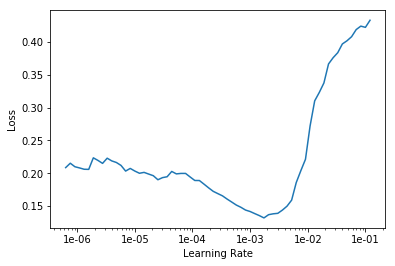

In [86]:
learn.recorder.plot()

We can see that perhaps the best range would be from `1e-4` to `1e-3`.

In [101]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(5e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.172373,3.103277,0.400000,00:06
1,0.316644,0.238908,0.066667,00:06


Hmm. ok. not bad. but `error_rate` tends to fluctuate in large amounts as I go through another new around of cycles. Maybe increase cycles to see any improvements?

In [102]:
learn.fit_one_cycle(3, max_lr=slice(5e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.265073,1.822390,0.366667,00:06
1,0.244729,2.112451,0.200000,00:06
2,0.214588,0.606221,0.133333,00:06


Well yeah. it's certainly better than the first around of cycles which gave an error rate of `0.833333` at the first epoch. And it reached `0.133333` at the third time only, which `learn` achieved with four epochs initially. 

# Resnet50
let's see if there are any improvements.

In [107]:
data = ImageDataBunch.from_lists(path, fnames, labels=labels, ds_tfms=tfms, size=700, bs=6)

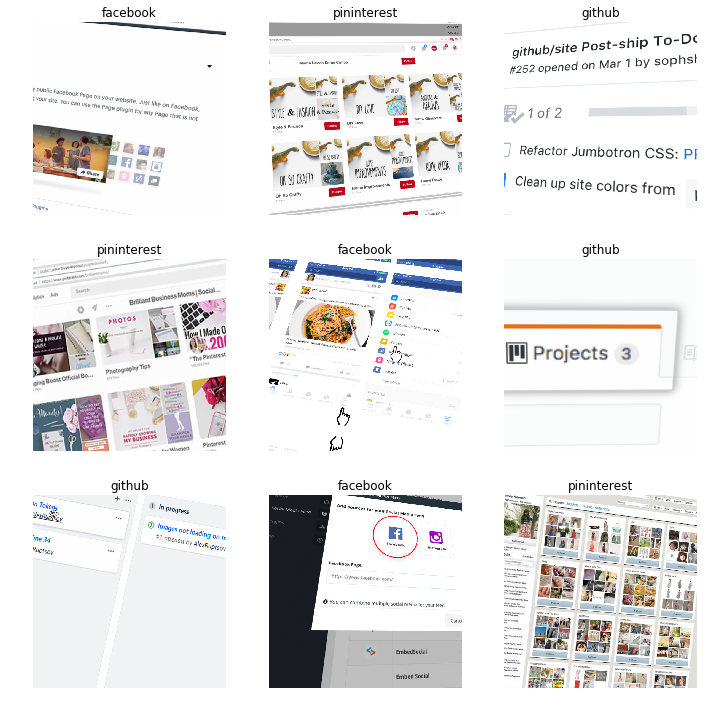

In [104]:
data.show_batch(rows=3, figsize=(10,10))

In [108]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [109]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f49049f6e18>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


RuntimeError: CUDA out of memory. Tried to allocate 179.50 MiB (GPU 0; 7.43 GiB total capacity; 6.11 GiB already allocated; 64.94 MiB free; 107.25 MiB cached)

Sadly, out of memory. But you can get a sense of what's gonna happen.